# Module 3 Project

### Rich Caputo

Welcome to my module 3 project! In this project, we will be analyzing rainfall weather in Australia and building a binary classification algorithm to predict whether or not it will rain tomorrow. This dataset is relatively clean but will require some feature engineering to extract the full essense of the data. Our hope is to build a robust and easy to use model using sklearn pipelines. All data transformations will be fit to the training set to avoid data snooping.

In [1]:
# Get essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
# Need to drop RISK_MM due to data leakage
# Set date to index and sort
df = pd.read_csv('weatherAUS.csv', parse_dates=['Date'], index_col=0).drop('RISK_MM', axis=1).sort_index()
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142193 entries, 2007-11-01 to 2017-06-25
Data columns (total 22 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     1421

As we can see, there is a fair bit of null entries in our data. We will need to impute these somehow. Let's examine how long our data set spans.

In [19]:
df.index.min(), df.index.max()

(Timestamp('2007-11-01 00:00:00'), Timestamp('2017-06-25 00:00:00'))

In [20]:
df.index.max() - df.index.min()

Timedelta('3524 days 00:00:00')

That's strange: it seems that although we have 3524 days of data, we have 142193 total entries in our data. Let's examine this.

In [21]:
df.index.value_counts()

2013-12-22    49
2014-02-27    49
2016-08-21    49
2013-07-02    49
2017-05-05    49
2013-10-06    49
2013-05-13    49
2014-07-14    49
2017-05-28    49
2014-04-14    49
2014-12-10    49
2017-05-13    49
2013-09-11    49
2014-05-25    49
2013-07-01    49
2014-07-15    49
2016-05-15    49
2016-06-30    49
2013-12-12    49
2013-05-12    49
2013-04-01    49
2013-03-19    49
2017-01-12    49
2013-06-12    49
2013-12-24    49
2014-10-19    49
2013-07-03    49
2013-10-23    49
2014-05-26    49
2017-05-15    49
              ..
2008-01-16     1
2007-11-06     1
2007-12-25     1
2008-01-13     1
2007-11-05     1
2008-01-02     1
2007-11-02     1
2008-01-31     1
2007-11-11     1
2008-01-29     1
2007-11-15     1
2007-12-17     1
2008-01-06     1
2008-01-03     1
2008-01-04     1
2007-12-08     1
2008-01-28     1
2008-01-14     1
2007-12-07     1
2008-01-09     1
2007-12-24     1
2007-11-18     1
2007-12-06     1
2007-12-04     1
2007-11-08     1
2007-11-14     1
2007-11-23     1
2007-11-13    

In [22]:
df.loc['2013-12-22']

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-22,Melbourne,16.6,28.4,0.0,1.6,0.0,NNW,54.0,NE,NNW,...,87.0,57.0,1008.0,1005.4,NaN,NaN,18.9,26.0,No,Yes
2013-12-22,CoffsHarbour,19.5,28.6,0.0,NaN,NaN,NNE,63.0,N,NE,...,63.0,55.0,1016.7,1013.2,1.0,5.0,25.6,26.6,No,No
2013-12-22,NorahHead,21.1,26.5,0.0,NaN,NaN,NNE,46.0,NNE,N,...,87.0,81.0,1013.0,1009.1,NaN,NaN,22.4,23.6,No,No
2013-12-22,Moree,24.2,37.7,0.0,15.8,12.6,NNE,52.0,NNE,NW,...,46.0,17.0,1015.6,1011.2,6.0,5.0,27.2,35.9,No,No
2013-12-22,Albany,12.1,21.5,0.0,6.2,12.2,NaN,NaN,NE,ESE,...,51.0,56.0,1021.5,1017.9,2.0,0.0,19.0,19.9,No,No
2013-12-22,Richmond,19.7,37.1,0.0,NaN,NaN,NNE,33.0,NNE,N,...,63.0,21.0,1012.0,1007.2,NaN,NaN,26.4,35.6,No,No
2013-12-22,Brisbane,19.0,30.0,0.0,9.4,12.7,ENE,26.0,NNW,ENE,...,54.0,52.0,1017.6,1014.9,2.0,2.0,26.2,28.4,No,No
2013-12-22,Cobar,25.8,42.5,0.0,18.8,NaN,NE,52.0,NNW,NNE,...,13.0,6.0,1010.3,1006.5,6.0,6.0,33.2,41.0,No,No
2013-12-22,Williamtown,21.0,36.0,0.0,29.8,NaN,NE,35.0,NNW,NE,...,72.0,41.0,1014.1,1009.7,6.0,7.0,25.1,34.7,No,No


Aha: Although we have entries with the same date occasionally, this is due to data representing different locations in Australia. Let's examine temperatures in different regions!

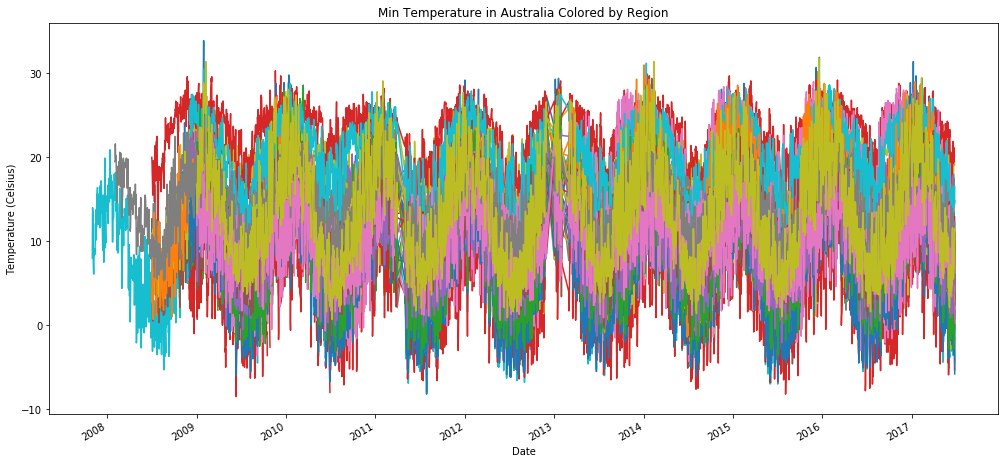

In [27]:
df.groupby('Location')['MinTemp'].plot(figsize=(17, 8))
plt.title('Min Temperature in Australia Colored by Region')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()

Although we don't have space to label the legend, this plot gives us an overall sense of how temperature fluctuates over time in Australia. Perhaps a good way to capture this seasonality would be to add a Month column to the data (we will do this during the modeling phase).

An interesting thing to do would be to visualize how this data varies by location in more ways than just temperature. To do this, we will perform PCA to project the data into 2-dimmensions and visualize data based on location.

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Imputer, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
df_nl = df.drop('Location', axis=1)
cat_cols = list(df_nl.select_dtypes(include=object, exclude=None).columns)

pipe = make_pipeline(
    DataFrameImputer(),
    StandardScaler(),
    PCA(n_components=3)   
)

X_red = pipe.fit_transform(pd.get_dummies(df_nl))

In [113]:
X_red

array([[-1.29662073,  0.41885537, -0.99527239],
       [-0.20678307,  2.09807829,  0.78020679],
       [-2.64946554,  4.21145615, -0.60392083],
       ...,
       [-0.95289117, -1.59662982, -2.02988345],
       [-1.16836787, -2.44309866,  0.58870066],
       [ 0.05023076, -1.18806379, -2.90347488]])

Text(0.5,1,'2D PCA Projection of Data Colored by Location')

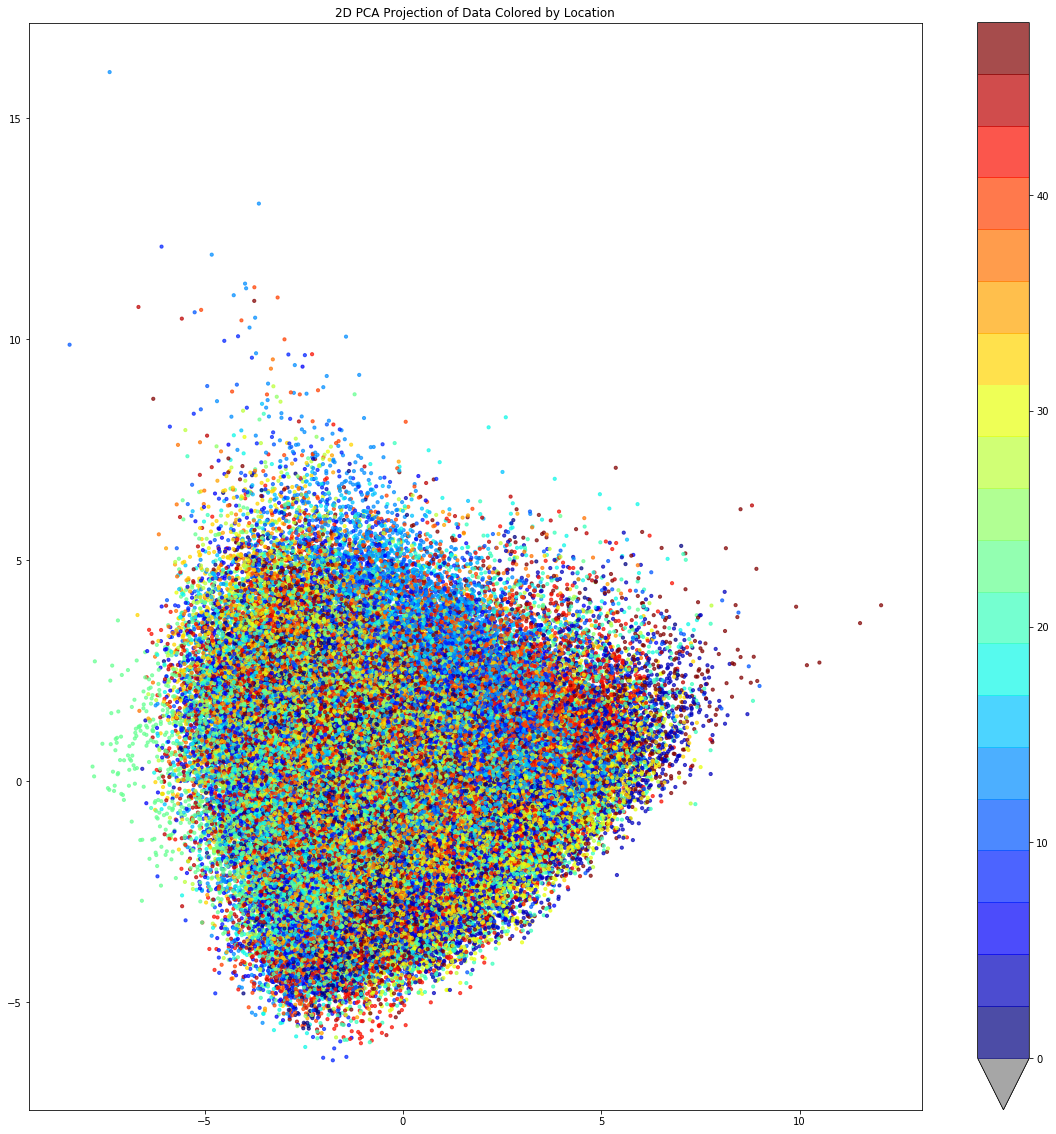

In [119]:
import matplotlib as mpl

cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.scatter(X_red[:, 0], X_red[:, 1], c=df.Location.astype('category').cat.codes, s=10, cmap=cmap, alpha=0.7)
fig.colorbar(cax, extend='min')
plt.title('2D PCA Projection of Data Colored by Location')

Text(0.5,0.92,'3D PCA Projection of Data Colored by Location')

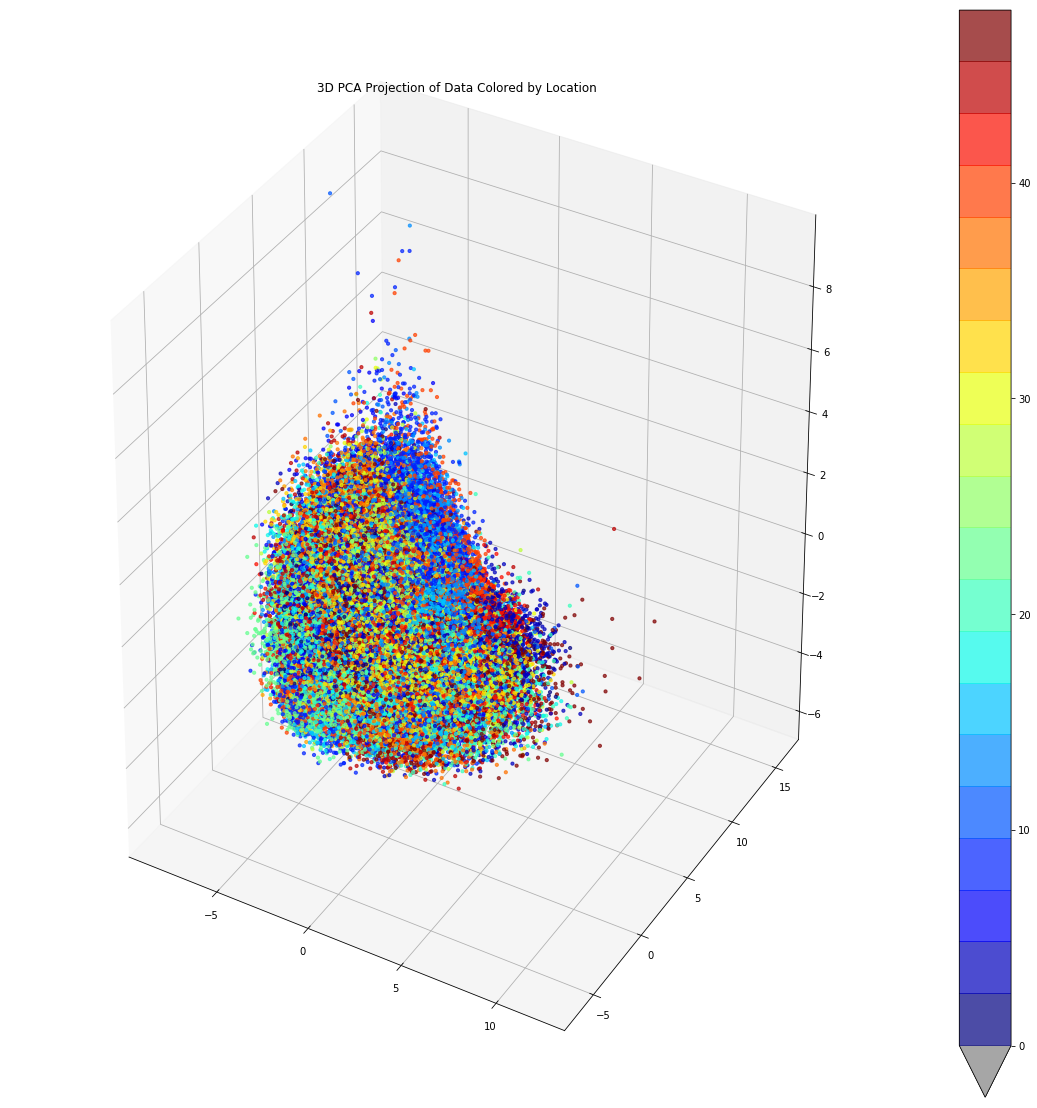

In [120]:
from mpl_toolkits.mplot3d import Axes3D

cmap = plt.get_cmap('jet', 20)
cmap.set_under('gray')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c=df.Location.astype('category').cat.codes, s=10, cmap=cmap, alpha=0.7)
fig.colorbar(cax, extend='min')
plt.title('3D PCA Projection of Data Colored by Location')